<a href="https://colab.research.google.com/github/Abdullah042973/AI-in-medical-domain/blob/main/HYBRID_CNN_WITH_SVM%20(multiclass%20clasification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
 
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.4.1'

In [ ]:
#data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/covid xray and ct scan/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6310 images belonging to 7 classes.


In [ ]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/covid xray and ct scan/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 975 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
def createmodel():
  # Part 2 - Building the CNN
  # Initialising the CNN
  cnn = tf.keras.models.Sequential()
  # Step 1 - Convolution
  cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
  # Step 2 - Pooling
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
  # Adding a second convolutional layer
  cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
  # Step 3 - Flattening
  cnn.add(tf.keras.layers.Flatten())
  # Step 4 - Full Connection
  cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
  # Step 5 - Output Layer
  #cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  cnn.add(Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='softmax'))
  cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])
  return cnn

model = createmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 9

In [ ]:
checkpoint_path = '/content/drive/model.ckpt'
callback = tensorflow.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

model = createmodel()

model.fit(x = training_set, validation_data = test_set, epochs = 20)


Epoch 1/20
198/198 [==============================] - 109s 549ms/step - loss: 1.1419 - accuracy: 0.4685 - val_loss: 0.9856 - val_accuracy: 0.7672
Epoch 2/20
198/198 [==============================] - 108s 547ms/step - loss: 1.0345 - accuracy: 0.6837 - val_loss: 0.9733 - val_accuracy: 0.7938
Epoch 3/20
198/198 [==============================] - 108s 547ms/step - loss: 1.0166 - accuracy: 0.7099 - val_loss: 0.9528 - val_accuracy: 0.8328
Epoch 4/20
198/198 [==============================] - 109s 549ms/step - loss: 0.9973 - accuracy: 0.7453 - val_loss: 0.9706 - val_accuracy: 0.7938
Epoch 5/20
198/198 [==============================] - 108s 548ms/step - loss: 0.9979 - accuracy: 0.7450 - val_loss: 0.9399 - val_accuracy: 0.8585
Epoch 6/20
198/198 [==============================] - 108s 545ms/step - loss: 0.9888 - accuracy: 0.7674 - val_loss: 0.9558 - val_accuracy: 0.8205
Epoch 7/20
198/198 [==============================] - 108s 547ms/step - loss: 0.9831 - accuracy: 0.7765 - val_loss: 0.9626 -

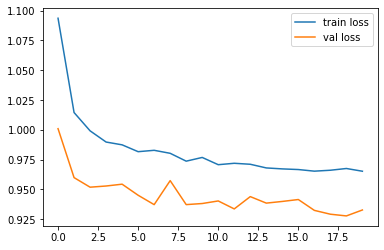

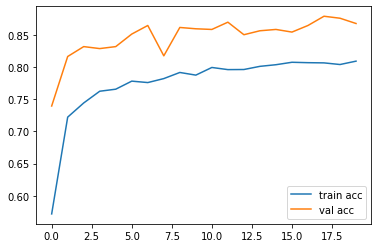

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/X-ray and CT scan ( binary classification )/TESTING/covid/COVID-19 (10).jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

array([[5.5864531e-09, 9.9994171e-01, 2.4043298e-10, 5.8238926e-05,
        3.6322012e-09, 5.7224350e-09, 5.6294303e-09]], dtype=float32)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/X-ray and CT scan ( binary classification )/TESTING/non-covid/NORMAL2-IM-0007-0001.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

NameError: ignored

In [ ]:
result

array([[0.00231698, 0.04591101, 0.33338612, 0.12229472, 0.4914042 ,
        0.00237948, 0.00230753]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
cnn.save('cnn_with_svm_(multiclass).h5')

In [ ]:
model = load_model('cnn_with_svm_(multiclass).h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 9

In [ ]:
checkpoint_path = '/content/drive/model.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
callback = tensorflow.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

In [ ]:
import cv2
import tensorflow as tf

In [ ]:
categories = ["ARDS","COVID-19","NORMAL","PNEMONIA BACTERIA","PNEMONIA VIRUS","SARS","STREPTOCOCCUSS"]
def prepare(filepath):
  IMG_SIZE = 64
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE) 
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model('cnn_with_svm_(multiclass).h5')
prediction = model.predict([prepare('COVID-19 (10).jpg')])
print(prediction)

error: ignored